In [8]:
library(nycflights13)

In [9]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

In [11]:
library(tidyverse)

In [20]:
by_day <- group_by(flights, year, month, day) 
summarize(by_day, delay = mean(dep_delay, na.rm = TRUE))

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477
2013,1,10,2.844995


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


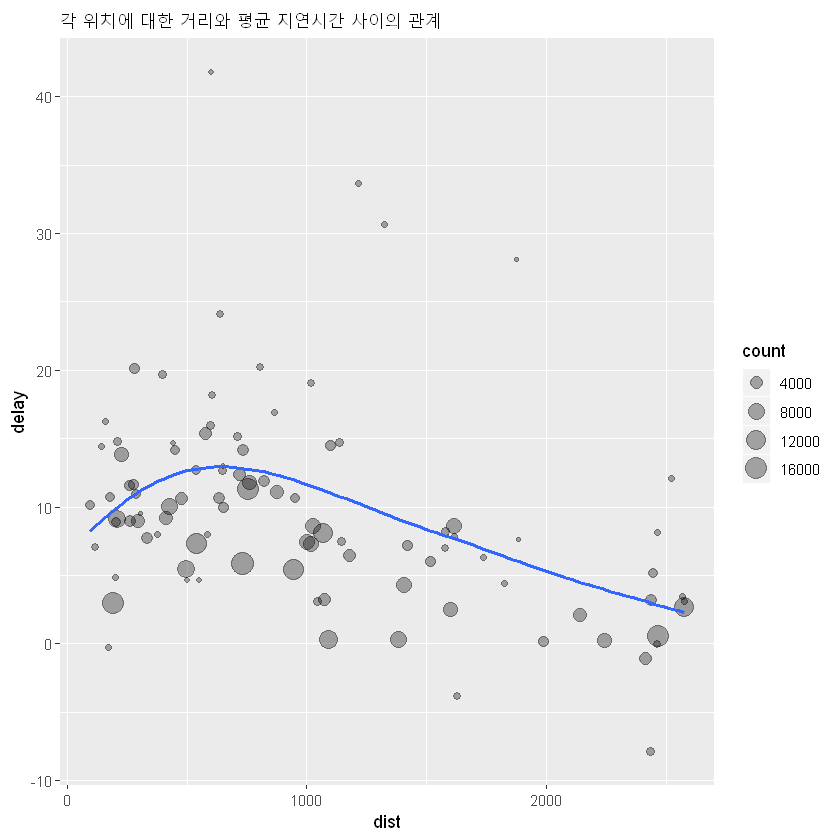

In [22]:
by_dest <- group_by(flights, dest)
delay <- summarize(by_dest, count = n(), 
                   dist = mean(distance, na.rm = TRUE), 
                   delay = mean(arr_delay, na.rm = TRUE)) 
delay <- filter(delay, count > 20, dest != "HNL") 
ggplot(data = delay, mapping = aes(x = dist, y = delay)) + 
geom_point(aes(size = count), alpha = 1/3) + geom_smooth(se=FALSE) +
   ggtitle("각 위치에 대한 거리와 평균 지연시간 사이의 관계")
